<a href="https://colab.research.google.com/github/shrazesh/heart-failure-prediction/blob/main/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import userdata
name = userdata.get('username')
key= userdata.get('kaggle_key')
os.environ["KAGGLE_USERNAME"] = name
os.environ["KAGGLE_KEY"] = key

# dataset download
!kaggle datasets download -d fedesoriano/heart-failure-prediction

# then we unzip
!unzip -o  heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 8.44MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


At first we download dataset from kaggle and unzip them


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


### 📦 Importing Required Libraries

In this section, we import all the essential Python libraries needed for data analysis, visualisation, preprocessing, and model training.

- **pandas**: Used for data manipulation and analysis, especially working with tabular data in DataFrames.
- **numpy**: Supports numerical operations, array manipulations, and mathematical functions.
- **matplotlib.pyplot**: A basic plotting library for creating static visualisations such as line charts, histograms, and scatter plots.
- **seaborn**: Built on top of Matplotlib, Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

From **scikit-learn**, we import:
- `train_test_split`: For splitting the dataset into training and testing subsets.
- `LogisticRegression`: The logistic regression model for binary classification tasks.
- `StandardScaler`: Standardises features by removing the mean and scaling to unit variance, which helps improve model performance.


In [ ]:
#Load and inspect the dataset
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Preprocessing
print("Shape of dataset:", df.shape)
print("\nInfo:\n")
print(df.info())

# Check for missing values
print("\nMissing values (column-wise):\n")
print(df.isnull().sum())

Shape of dataset: (918, 12)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Missing values (column-wise):

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingEC

In [ ]:
##@ Data Cleaning for Heart Failure Dataset

# List of columns where 0 might be invalid (based on domain knowledge)
zero_check_cols = ['Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']

# Check how many zero values exist in each of these columns
for col in zero_check_cols:
    num_zeros = (df[col] == 0).sum()
    print(f"{col}: {num_zeros} zeros")

# Create a copy of the original dataframe
df_cleaned = df.copy()

# Replace zeros with NaN in the identified columns
df_cleaned[zero_check_cols] = df_cleaned[zero_check_cols].replace(0, np.nan)

# Show missing values after replacement
print("\nMissing values (after replacing zeros):")
print(df_cleaned.isnull().sum())

# Impute missing values using median (suitable for skewed medical data)
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)

# Final check for missing values
print("\n✅ All cleaned:")
print(df_cleaned.isnull().sum())


Cholesterol: 172 zeros
RestingBP: 1 zeros
MaxHR: 0 zeros
Oldpeak: 368 zeros

Missing values (after replacing zeros):
Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease        0
dtype: int64

✅ All cleaned:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Using Logistic Regression technique

In [ ]:
##@ Model Training and Evaluation

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ---- Predictions ----
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# ---- Evaluation ----
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



Model Performance Summary
Accuracy: 85.3%
→ The model correctly predicted 85.3% of the test cases.


Precision: Out of all predicted cases for a class, how many were correct.

Recall: Out of all actual cases for a class, how many were detected.

F1-Score: Harmonic mean of precision and recall (balance between the two).

The model is very accurate (85%) overall.

It is more precise at detecting heart disease (90%), though slightly less sensitive (recall = 84%).

It also does a good job of detecting non-heart disease cases, with 87% of them correctly identified.

The F1-scores (83% and 87%) show the model performs well across both classes.

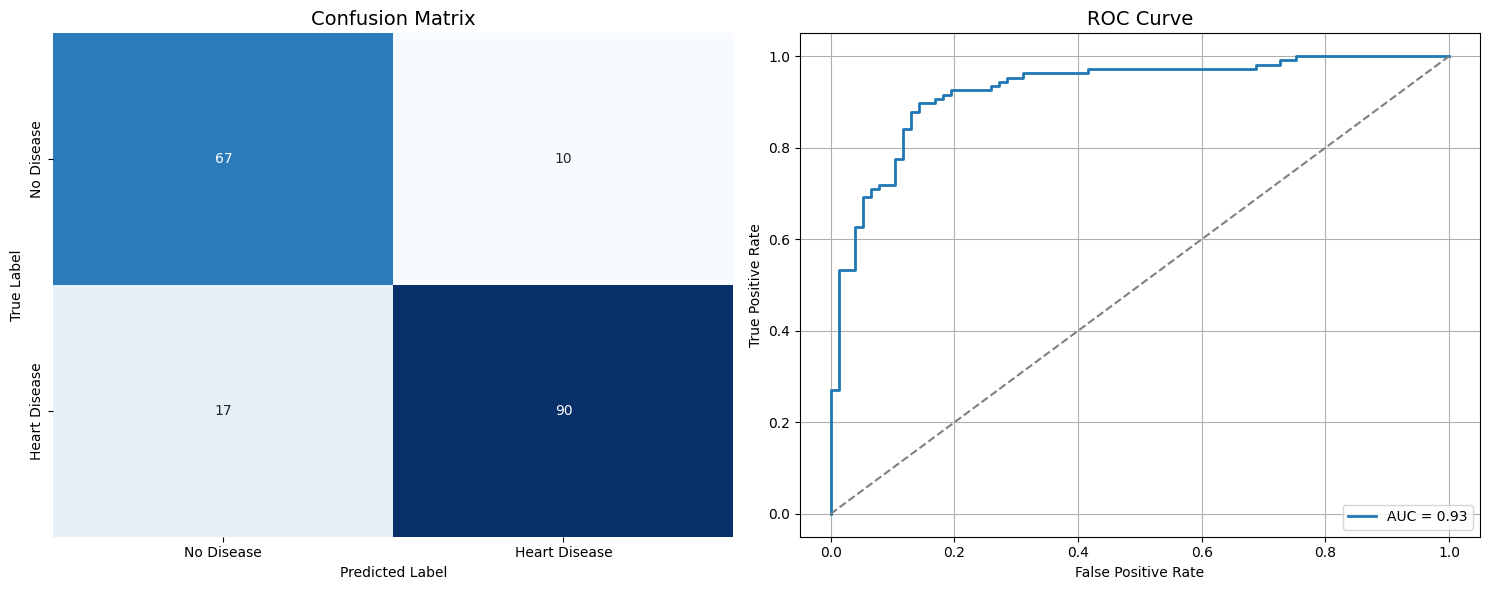

In [ ]:
##@ Plots

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Add labels to the ticks if binary
axes[0].xaxis.set_ticklabels(['No Disease', 'Heart Disease'])
axes[0].yaxis.set_ticklabels(['No Disease', 'Heart Disease'])

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

axes[1].plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', linewidth=2)
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("ROC Curve", fontsize=14)
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid(True)

# Layout adjustments
plt.tight_layout()
plt.show()


now we use Randomforest Technique

In [ ]:
##@train-test split and scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reuse the cleaned and encoded dataset
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# One-hot encoding if needed
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
##@ Model Training: Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



The Random Forest model achieved a high accuracy of approximately 87% on the test data for heart failure prediction. It performed well for both classes, especially in detecting heart disease cases, with a precision of 88% and a recall of 89%. This means it was very effective at correctly identifying patients with heart disease while minimizing false positives. The model also maintained balanced performance on non-disease cases, with an F1-score of 85%. Overall, the Random Forest classifier shows strong and reliable predictive ability for this medical classification task.

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]



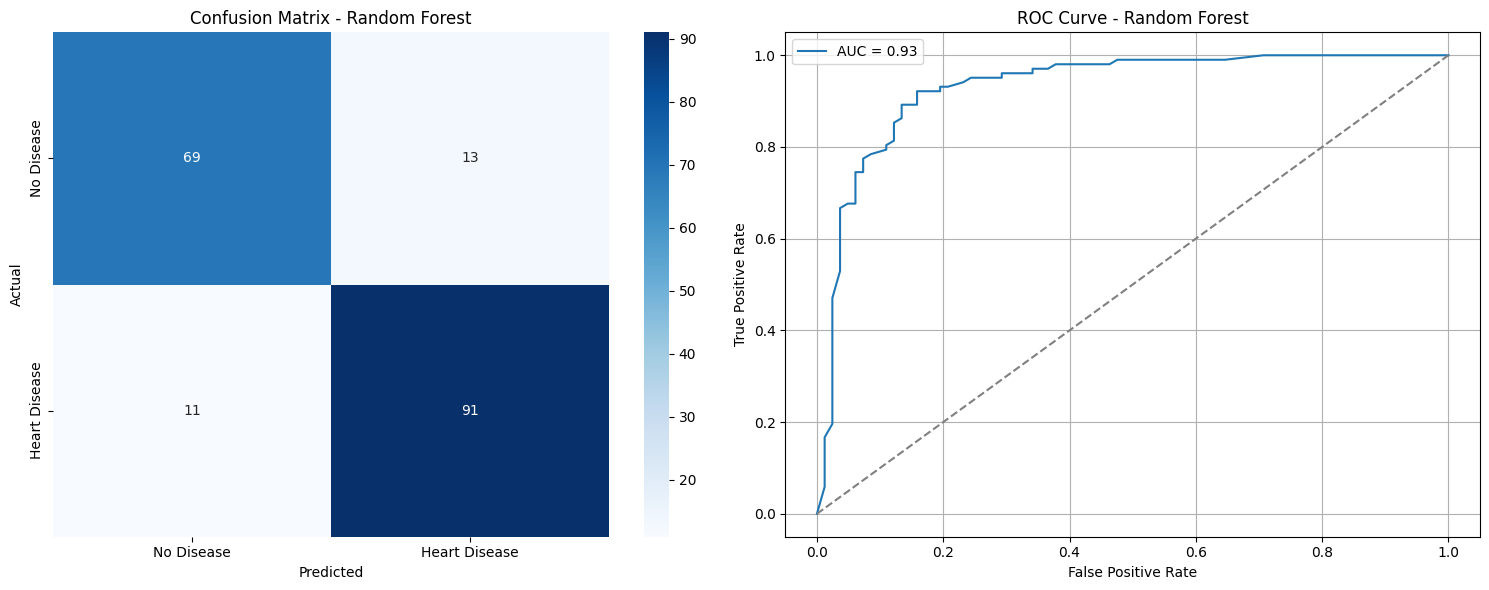

In [ ]:
##@ Plots: Confusion Matrix & ROC Curve for Random Forest

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Create a 1x2 plot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Random Forest")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].xaxis.set_ticklabels(['No Disease', 'Heart Disease'])
axes[0].yaxis.set_ticklabels(['No Disease', 'Heart Disease'])

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("ROC Curve - Random Forest")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


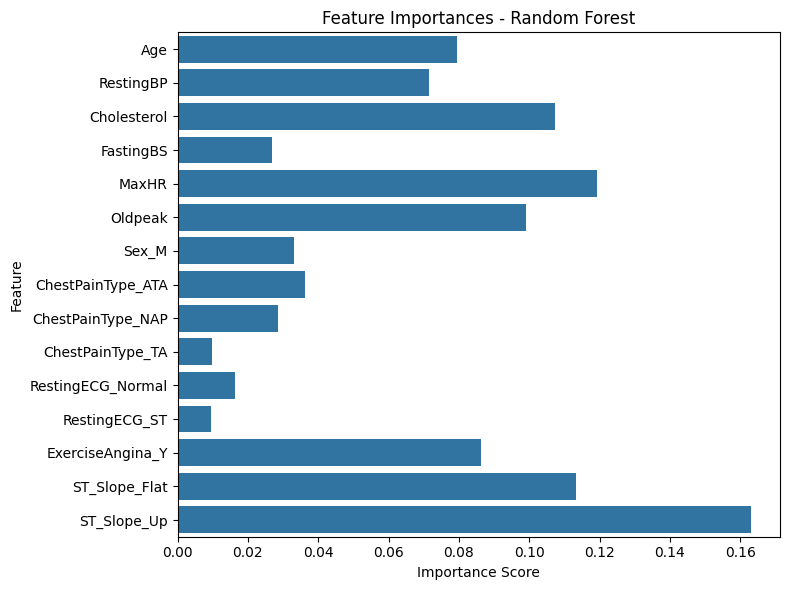

In [ ]:
##@ Feature Importance Plot - Random Forest

importances = rf_model.feature_importances_
features = X.columns

# Plot top features
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Now comparing outputs between logistic regression and randomforest

📊 Logistic Regression Accuracy: 0.8532608695652174
📊 Random Forest Accuracy:       0.875


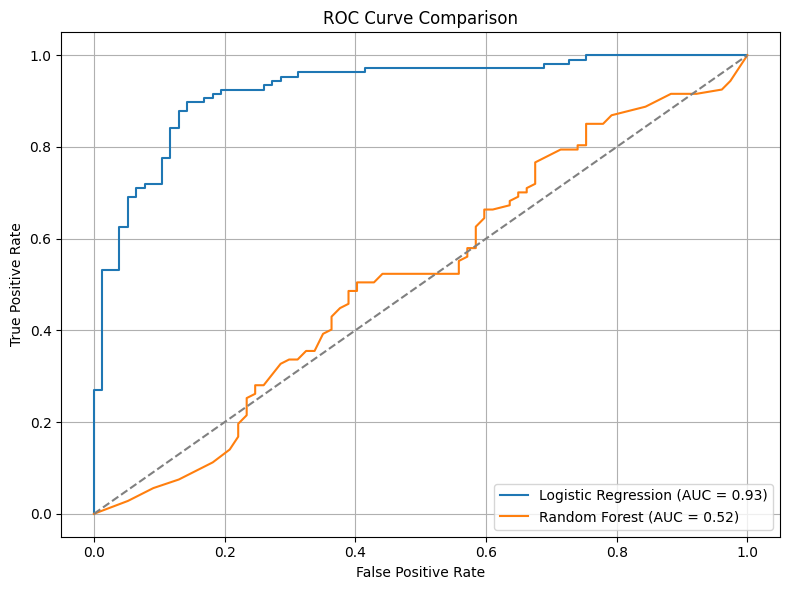

In [ ]:
##@ Logistic Regression vs Random Forest Comparison (Corrected Variables)

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Accuracy comparison
print("📊 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Random Forest Accuracy:      ", accuracy_score(y_test, y_pred_rf))

# ROC curve values
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



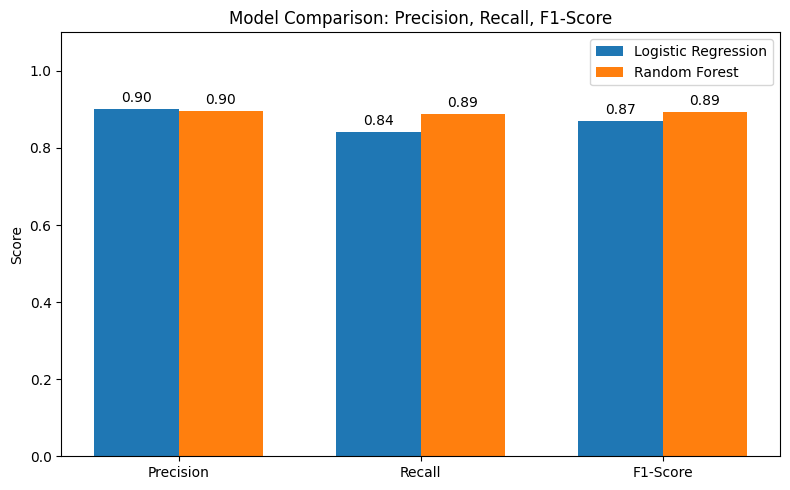

In [ ]:
##@ Bar Chart Comparison: Precision, Recall, F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Calculate metrics
metrics = ['Precision', 'Recall', 'F1-Score']
log_scores = [
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred)
]

rf_scores = [
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# Create bar chart
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, log_scores, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Precision, Recall, F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()
ax.bar_label(bars1, fmt='%.2f', padding=3)
ax.bar_label(bars2, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


This bar chart compares the performance of two classification models—Logistic Regression and Random Forest—on the Heart Failure Prediction Dataset, based on three evaluation metrics: Precision, Recall, and F1-Score.

 Precision:
Both models perform equally well with a precision of 0.90.
→ They are equally good at predicting true positive cases of heart failure.

 Recall:
Random Forest (0.89) outperforms Logistic Regression (0.84).
→ RF detects more actual heart failure cases than LR.

 F1-Score:
Random Forest (0.89) is slightly better than Logistic Regression (0.87).
→ RF maintains a better balance between precision and recall.

Conclusion:

Random Forest performs slightly better overall, especially in terms of recall, making it more reliable for medical predictions where missing a positive case (e.g., heart failure) could be critical.
